# Cheminformatics tutorial NB

This notebook can be used to provide a brief introduction to some approaches to utilize chemical structure information in data science. This notebook pulls from examples found both in the RDkit documentation as well as some from other websources and are cited accordingly. 

In [1]:
from rdkit import Chem

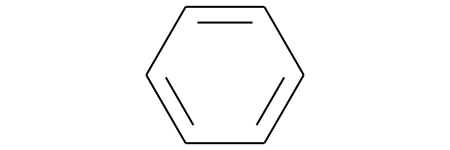

In [2]:
# What is a molecule? Drawn as a 2D depiction
benzene=Chem.MolFromSmiles('c1ccccc1') # Smiles representation (strings of letters/numbers/symobls)
benzene

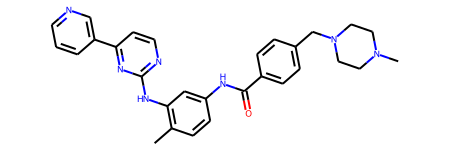

In [3]:
# A more complex molecule: Gleevec - a chemothereputic agent for leukemia (blood cancer)
gleevec=Chem.MolFromSmiles('CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C)NC4=NC=CC(=N4)C5=CN=CC=C5')
gleevec

In [4]:
Chem.Draw.MolToFile(benzene,'2D_sctructure_benzene.png',size=(300,300))

In [5]:
Chem.Draw.MolToFile(gleevec,'2D_sctructure_gleevec.png',size=(300,300))

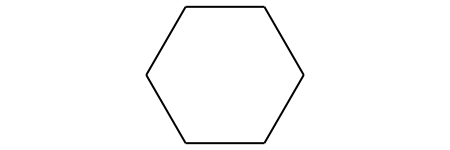

In [6]:
cyclo_hexane=Chem.MolFromSmiles('C1CCCCC1') # Smiles representation (strings of letters/numbers/symobls)
Chem.Draw.MolToFile(cyclo_hexane,'2D_sctructure_cyclohexane.png',size=(300,300))
cyclo_hexane

In [7]:
from rdkit.Chem import AllChem
import numpy as np
np.set_printoptions(threshold=np.inf)

In [16]:
# We can represent a molecule as a fingerprint
radius=2
bits=100
np.array(AllChem.GetMorganFingerprintAsBitVect(gleevec,radius,nBits=bits))
# This will produce a vector based on the representation 

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [17]:
np.array(AllChem.GetMorganFingerprintAsBitVect(benzene,radius,nBits=bits))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
# Above we can see the difference reflected in the two finger prints.
# normally, more bits are used to avoid collisions between different molecules

In [32]:
from rdkit.Chem import Draw # https://www.rdkit.org/docs/GettingStartedInPython.html
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(gleevec, radius=2, bitInfo=bi,nBits=bits)
bi


{0: ((31, 1),),
 3: ((35, 2),),
 8: ((1, 0), (2, 0), (4, 0), (10, 0), (13, 0), (25, 0), (29, 0), (31, 0)),
 10: ((33, 2),),
 12: ((29, 1),),
 13: ((16, 1),),
 14: ((25, 2),),
 15: ((8, 0),),
 16: ((7, 0), (24, 0), (17, 2)),
 18: ((31, 2),),
 19: ((24, 2),),
 25: ((28, 2),),
 27: ((8, 2),),
 30: ((9, 0), (1, 2)),
 31: ((20, 1),),
 34: ((27, 1), (34, 1)),
 37: ((0, 0), (23, 0), (32, 2)),
 39: ((17, 0), (20, 0), (24, 1), (16, 2)),
 43: ((1, 1), (6, 2), (26, 2)),
 45: ((10, 2),),
 46: ((7, 2),),
 47: ((17, 1), (13, 2), (5, 2)),
 48: ((18, 1), (19, 1), (21, 1), (26, 1), (22, 1)),
 54: ((13, 1), (25, 1)),
 55: ((30, 2),),
 59: ((27, 2),),
 64: ((2, 2),),
 66: ((0, 1),),
 68: ((7, 1),),
 69: ((3, 0),
  (5, 0),
  (6, 0),
  (11, 0),
  (12, 0),
  (14, 0),
  (15, 0),
  (27, 0),
  (28, 0),
  (32, 0),
  (34, 0),
  (35, 0),
  (36, 0)),
 70: ((5, 1), (11, 1), (12, 1), (14, 1), (28, 1), (6, 1), (15, 1), (36, 1)),
 72: ((16, 0),),
 73: ((3, 2),),
 75: ((30, 1),),
 76: ((2, 1),),
 77: ((10, 1),),
 80: (

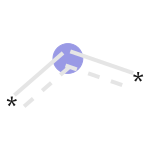

In [33]:
# Show what structure is tied to this fingerprint:
mfp2_svg = Draw.DrawMorganBit(gleevec, 69, bi, useSVG=True)
mfp2_svg

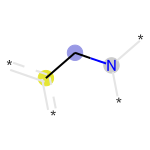

In [34]:
mfp2_svg = Draw.DrawMorganBit(gleevec, 13, bi, useSVG=True)
mfp2_svg

In [35]:
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(benzene, radius=2, bitInfo=bi,nBits=bits)
bi

{13: ((2, 2), (3, 2), (1, 2), (0, 2), (5, 2), (4, 2)),
 69: ((0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)),
 84: ((1, 1), (2, 1), (3, 1), (4, 1), (0, 1), (5, 1))}

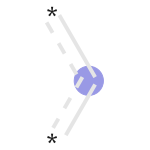

In [36]:
mfp2_svg = Draw.DrawMorganBit(benzene, bitId=69, bitInfo=bi, useSVG=True)
mfp2_svg

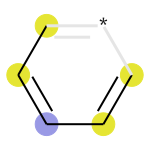

In [37]:
mfp2_svg = Draw.DrawMorganBit(benzene, bitId=13, bitInfo=bi, useSVG=True)
mfp2_svg

In [61]:
# These fingerprints can then be used as a molecular representation to perform common data science tasks

In [44]:
# For example we can compare the similarity between two vectors:
from rdkit import DataStructs
benzene_fp=AllChem.GetMorganFingerprintAsBitVect(benzene, radius=2, bitInfo=bi,nBits=bits)
gleevec_fp=AllChem.GetMorganFingerprintAsBitVect(gleevec, radius=2, bitInfo=bi,nBits=bits)
print(DataStructs.TanimotoSimilarity(benzene_fp,gleevec_fp))
# https://jcheminf.biomedcentral.com/articles/10.1186/s13321-015-0069-3

0.06


[0.3333333333333333, 1.0, 0.06]


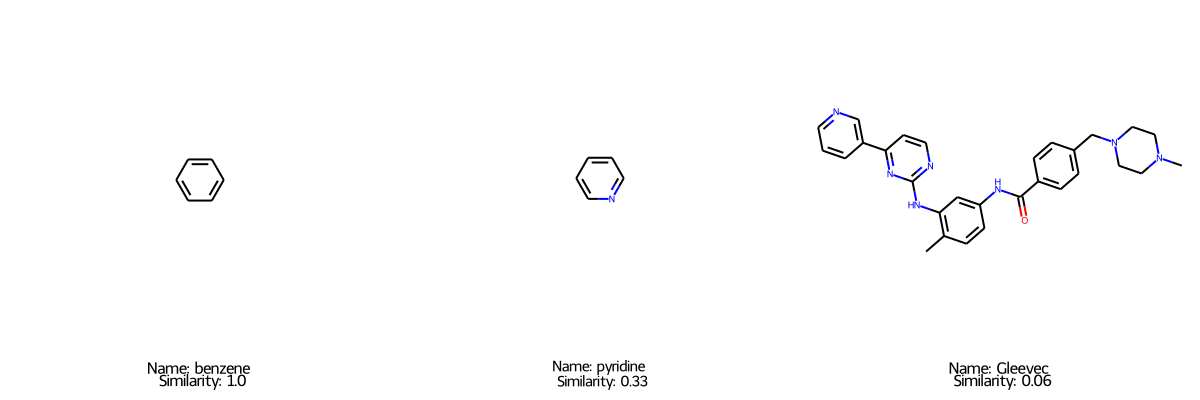

In [ ]:
# compare two molecules that are more similar:
pyridine=Chem.MolFromSmiles('c1ncccc1')
pyridine_fp=AllChem.GetMorganFingerprintAsBitVect(pyridine, radius=2, nBits=bits)
pyridine.SetProp('name','pyridine')
benzene.SetProp('name','benzene')
gleevec.SetProp('name','Gleevec')

sim_pyr= DataStructs.TanimotoSimilarity(pyridine_fp,benzene_fp)
sim_ben=DataStructs.TanimotoSimilarity(benzene_fp,benzene_fp)
sim_gleevec=DataStructs.TanimotoSimilarity(benzene_fp,gleevec_fp)
print([sim_pyr,sim_ben,sim_gleevec])
pyridine.SetDoubleProp('sim_benzene',sim_pyr)
benzene.SetDoubleProp('sim_benzene',sim_ben)
gleevec.SetDoubleProp('sim_benzene',sim_gleevec)

Draw.MolsToGridImage([benzene,pyridine,gleevec],molsPerRow=3,subImgSize=(400,400),legends=[f'Name: {x.GetProp("name")} \n Similarity: {round(float(x.GetProp("sim_benzene")),2)}' for x in [benzene,pyridine,gleevec]])


In [75]:
DataStructs.TanimotoSimilarity(pyridine_fp,benzene_fp) # these are much more similar

0.3333333333333333